In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.layers import Dropout, Dense, Flatten, BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, callbacks, applications
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install bing-image-downloader

In [ ]:
from bing_image_downloader import downloader

penguins = ['chinstrap penguin', 'emperor penguin', 'king penguin']

for penguin in penguins:
    downloader.download(penguin,
                        limit=200,
                        output_dir='dataset_2',
                        adult_filter_off=True,
                        force_replace=False,
                        timeout=60,
                        verbose=True)


Streaming output truncated to the last 5000 lines.
[%] Downloading Image #118 from https://c8.alamy.com/comp/DXHXCA/a-chinstrap-penguin-pygoscelis-antarctica-at-hannah-point-on-livingston-DXHXCA.jpg
[%] File Downloaded !

[%] Downloading Image #119 from https://wallpapercave.com/wp/wp9320738.jpg
[%] File Downloaded !



[!!]Indexing page: 111

[%] Indexed 35 Images on Page 111.


[%] Downloading Image #120 from https://animalcorner.org/wp-content/uploads/2015/02/chinstrap-penguin-1.jpg
[%] File Downloaded !



[!!]Indexing page: 112

[%] Indexed 35 Images on Page 112.




[!!]Indexing page: 113

[%] Indexed 35 Images on Page 113.


[%] Downloading Image #121 from https://alchetron.com/cdn/chinstrap-penguin-571c73c0-a826-493f-84df-035ec0b629d-resize-750.jpeg
[%] File Downloaded !



[!!]Indexing page: 114

[%] Indexed 35 Images on Page 114.


[%] Downloading Image #122 from https://api.time.com/wp-content/uploads/2020/02/antarctica-penguin-study-greenpeace-07.jpg
[%] File Downloaded !



In [ ]:
import os
print(os.getcwd())
# change the directory to match your dateset location
data_dir = 'dataset_2'

Name = os.listdir(data_dir)
print(Name)
print(len(Name))

N=list(range(len(Name)))
normal_mapping=dict(zip(Name,N))
reverse_mapping=dict(zip(N,Name))

/content
['king penguin', 'chinstrap penguin', 'emperor penguin']
3


In [ ]:
preprocess_input = tf.keras.applications.resnet.preprocess_input

# Rescaling the input image as well as Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
        validation_split=0.2,
        rotation_range=30,
        width_shift_range=0.2,
        preprocessing_function=preprocess_input,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(255,255),
    class_mode='categorical',
  batch_size=6,subset = "training")

validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    target_size=(255,255),
    class_mode='categorical',
  batch_size=6,subset = "validation")

Found 478 images belonging to 3 classes.
Found 118 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = (255, 255, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
# don't forget to add an activation function to the output layer
model.add(layers.Dense(3, activation='softmax'))
model.add(layers.Dense(3))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
62/80 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.3275 - loss: 5.3016

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


80/80 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.3280 - loss: 5.3050 - val_accuracy: 0.3390 - val_loss: 5.4638
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.3173 - loss: 5.1149 - val_accuracy: 0.3390 - val_loss: 5.4638
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.3645 - loss: 5.8746 - val_accuracy: 0.3390 - val_loss: 5.4638
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.3355 - loss: 5.4078 - val_accuracy: 0.3390 - val_loss: 5.4638
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.3380 - loss: 5.4476 - val_accuracy: 0.3390 - val_loss: 5.4638
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.3078 - loss: 4.9609 - val_accuracy: 0.3390 - val_loss: 5.4638
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.3033 - loss: 4.8892 - val_accuracy: 0.3390 - val_loss: 5.4638
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.3670 - loss: 5.9152 - val_accuracy: 0.3390 - val_loss: 5.4638
Epo

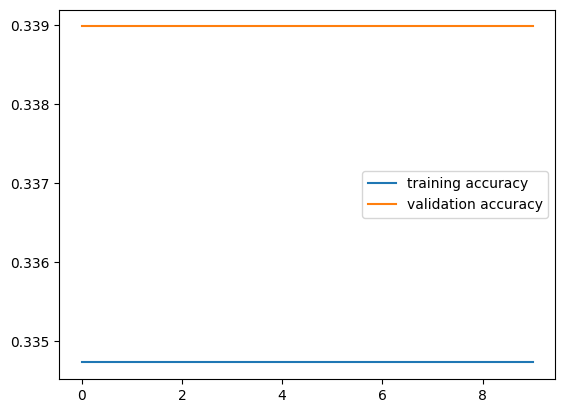

In [ ]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [13]:
# improved CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=4,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.3999 - loss: 1.1044 - val_accuracy: 0.3644 - val_loss: 1.1078
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.5771 - loss: 0.9290 - val_accuracy: 0.3983 - val_loss: 1.3337
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.6511 - loss: 0.8457 - val_accuracy: 0.2797 - val_loss: 1.8289
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.6497 - loss: 0.8321 - val_accuracy: 0.3898 - val_loss: 1.3393
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.6956 - loss: 0.7124 - val_accuracy: 0.3983 - val_loss: 1.6261
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.7207 - loss: 0.7067 - val_accuracy: 0.3814 - val_loss: 2.0721


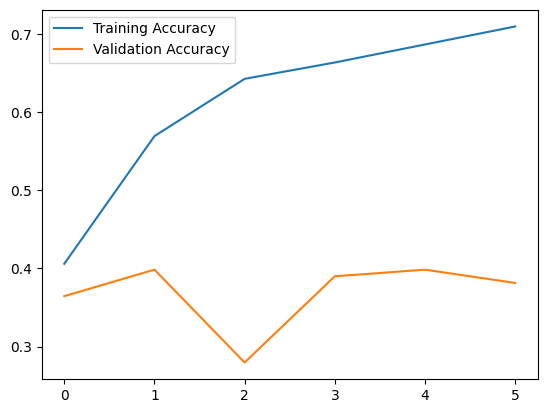

In [14]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

- increased number of layers to allow model to learn more complex features from the images
- maxpooling to prevent overfitting and improve efficiency
- used flatten() to reduce overfitting and improve generalization
- added dropout to reduce overfitting and improve generalization
- added early stoping as instructed to prevent unnecessary training


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step


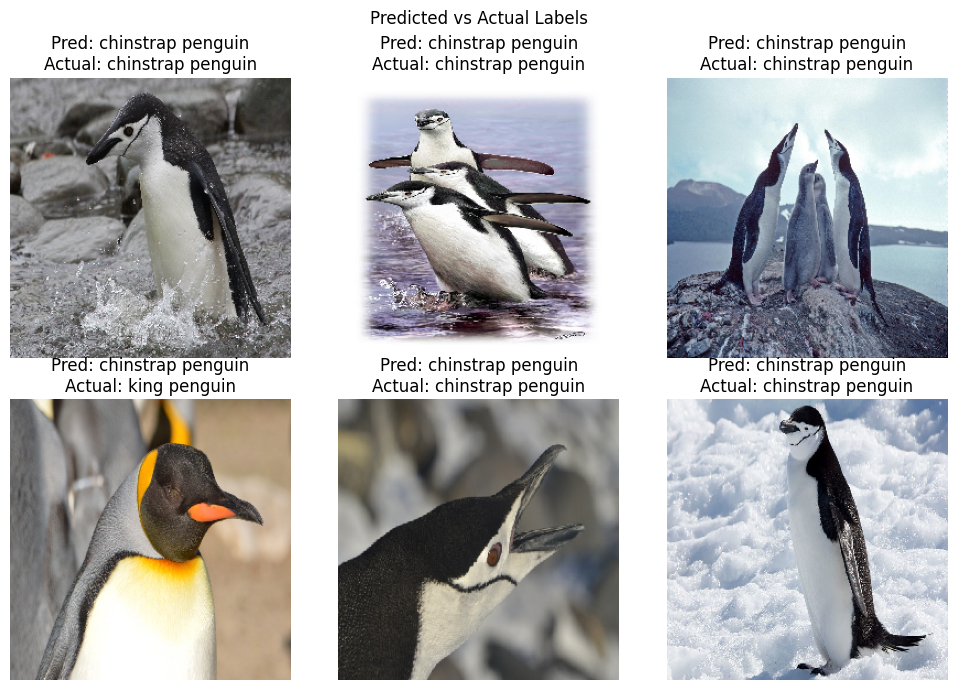

In [15]:
class_names = list(validation_generator.class_indices.keys())
images, labels = next(validation_generator)
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels, axis=1)

fig, axes = plt.subplots(2, 3, figsize=(10, 7))
fig.suptitle("Predicted vs Actual Labels")

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    pred_label = class_names[predicted_labels[i]]
    true_label = class_names[true_labels[i]]
    ax.set_title(f"Pred: {pred_label}\nActual: {true_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

<ipython-input-19-d9ca1ba4e22c>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(255, 255, 3))


Epoch 1/20
34/80 ━━━━━━━━━━━━━━━━━━━━ 21s 464ms/step - accuracy: 0.4190 - loss: 1.5381

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


80/80 ━━━━━━━━━━━━━━━━━━━━ 54s 600ms/step - accuracy: 0.5133 - loss: 1.2735 - val_accuracy: 0.7542 - val_loss: 0.5963
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 47s 576ms/step - accuracy: 0.7323 - loss: 0.6366 - val_accuracy: 0.8136 - val_loss: 0.5194
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 48s 597ms/step - accuracy: 0.7830 - loss: 0.5388 - val_accuracy: 0.8220 - val_loss: 0.4662
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 46s 570ms/step - accuracy: 0.8600 - loss: 0.3744 - val_accuracy: 0.8898 - val_loss: 0.3762
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 48s 599ms/step - accuracy: 0.8538 - loss: 0.4110 - val_accuracy: 0.8390 - val_loss: 0.3559
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 48s 600ms/step - accuracy: 0.8515 - loss: 0.3522 - val_accuracy: 0.8898 - val_loss: 0.3683
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 45s 561ms/step - accuracy: 0.7926 - loss: 0.4346 - val_accuracy: 0.8559 - val_loss: 0.3727
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 47s 590ms/step - accuracy: 0.8433 - loss: 0.3534 - val_accuracy: 0.839

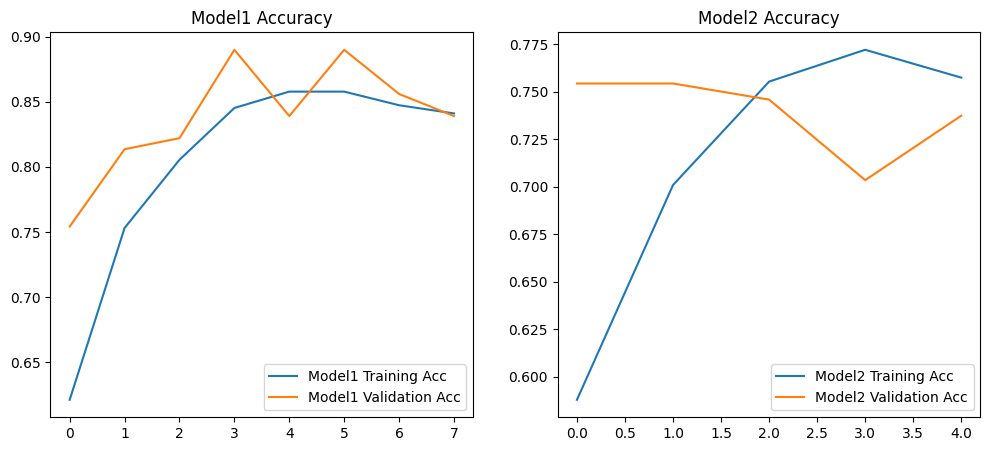

In [19]:
model = applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(255, 255, 3))
model.trainable = False

# GlobalAveragePooling
model1 = keras.Sequential([
    model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# flatten and dense layers
model2 = keras.Sequential([
    model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=4,
    restore_best_weights=True
)

# train first model
history1 = model1.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# train second model
history2 = model2.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(history1.history['accuracy'], label='Model1 Training Acc')
ax[0].plot(history1.history['val_accuracy'], label='Model1 Validation Acc')
ax[0].set_title('Model1 Accuracy')
ax[0].legend()

ax[1].plot(history2.history['accuracy'], label='Model2 Training Acc')
ax[1].plot(history2.history['val_accuracy'], label='Model2 Validation Acc')
ax[1].set_title('Model2 Accuracy')
ax[1].legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


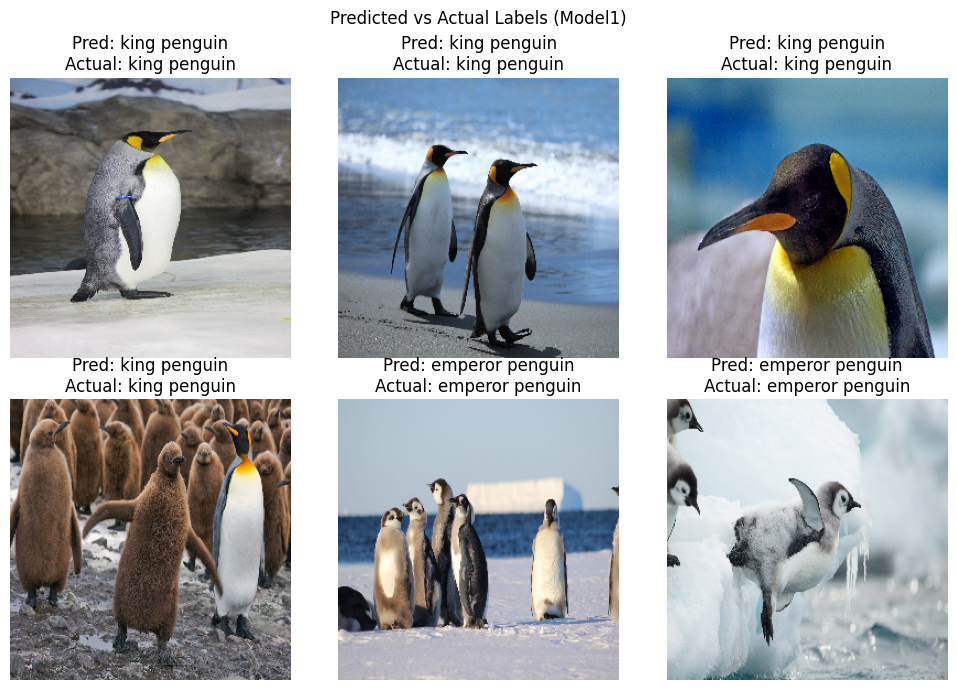

In [20]:
class_names = list(validation_generator.class_indices.keys())
images, labels = next(validation_generator)
predictions = model1.predict(images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels, axis=1)

fig, axes = plt.subplots(2, 3, figsize=(10, 7))
fig.suptitle("Predicted vs Actual Labels (Model1)")

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    pred_label = class_names[predicted_labels[i]]
    true_label = class_names[true_labels[i]]
    ax.set_title(f"Pred: {pred_label}\nActual: {true_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


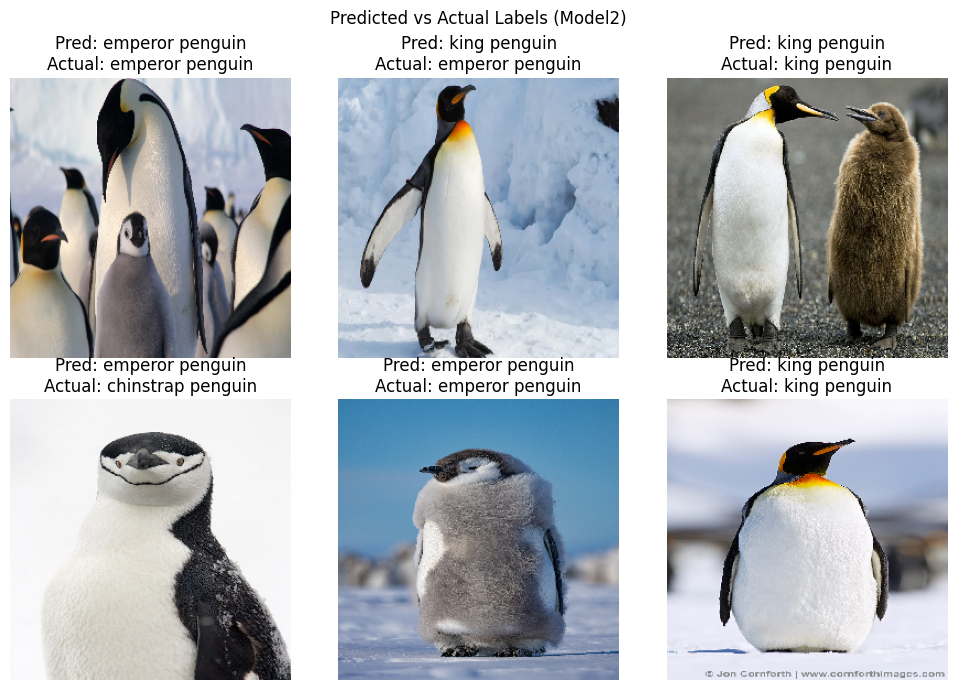

In [21]:
class_names = list(validation_generator.class_indices.keys())
images, labels = next(validation_generator)
predictions = model2.predict(images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels, axis=1)

fig, axes = plt.subplots(2, 3, figsize=(10, 7))
fig.suptitle("Predicted vs Actual Labels (Model2)")

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    pred_label = class_names[predicted_labels[i]]
    true_label = class_names[true_labels[i]]
    ax.set_title(f"Pred: {pred_label}\nActual: {true_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [23]:
# no augmentation

train_datagen_no_aug = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

validation_datagen_no_aug = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, validation_split=0.2
)

train_generator_no_aug = train_datagen_no_aug.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=6,
    subset='training'
)

validation_generator_no_aug = validation_datagen_no_aug.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=6,
    subset='validation'
)

Found 478 images belonging to 3 classes.
Found 118 images belonging to 3 classes.


In [25]:
model = applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.trainable = False

# best model (model1)
best_model = keras.Sequential([
    model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

best_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=4,
    restore_best_weights=True
)

history_no_aug = best_model.fit(
    train_generator_no_aug,
    epochs=20,
    validation_data=validation_generator_no_aug,
    callbacks=[early_stopping]
)

Epoch 1/20
64/80 ━━━━━━━━━━━━━━━━━━━━ 5s 330ms/step - accuracy: 0.5223 - loss: 1.2883

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 444ms/step - accuracy: 0.5445 - loss: 1.2173 - val_accuracy: 0.8729 - val_loss: 0.3705
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 36s 451ms/step - accuracy: 0.8183 - loss: 0.4616 - val_accuracy: 0.8898 - val_loss: 0.3397
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 33s 408ms/step - accuracy: 0.9063 - loss: 0.2950 - val_accuracy: 0.8814 - val_loss: 0.2785
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 36s 450ms/step - accuracy: 0.8792 - loss: 0.2992 - val_accuracy: 0.8898 - val_loss: 0.2431
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 32s 406ms/step - accuracy: 0.9233 - loss: 0.2058 - val_accuracy: 0.8814 - val_loss: 0.3257
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 34s 423ms/step - accuracy: 0.9183 - loss: 0.2194 - val_accuracy: 0.8983 - val_loss: 0.2605
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 32s 404ms/step - accuracy: 0.9346 - loss: 0.1786 - val_accuracy: 0.9068 - val_loss: 0.2864
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 42s 424ms/step - accuracy: 0.9558 - loss: 0.1488 - val_accuracy: 0.898

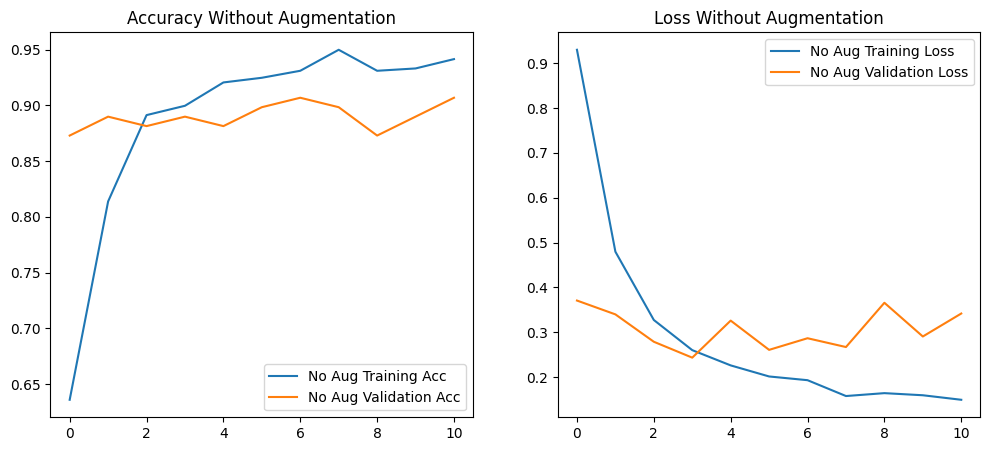

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(history_no_aug.history['accuracy'], label='No Aug Training Acc')
ax[0].plot(history_no_aug.history['val_accuracy'], label='No Aug Validation Acc')
ax[0].set_title('Accuracy Without Augmentation')
ax[0].legend()

ax[1].plot(history_no_aug.history['loss'], label='No Aug Training Loss')
ax[1].plot(history_no_aug.history['val_loss'], label='No Aug Validation Loss')
ax[1].set_title('Loss Without Augmentation')
ax[1].legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


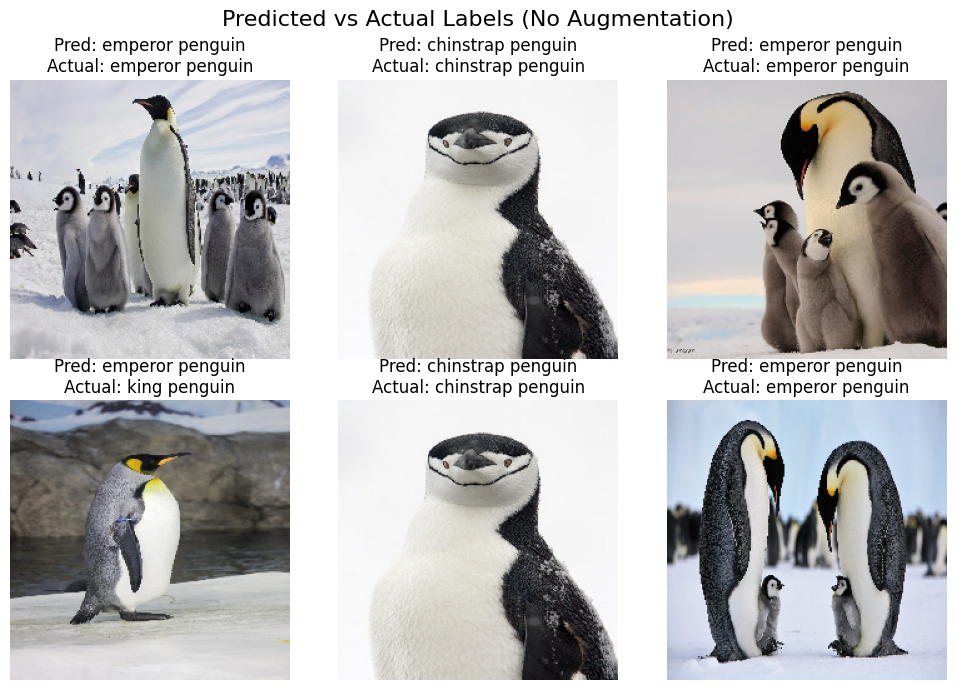

In [27]:
class_names = list(validation_generator_no_aug.class_indices.keys())
images, labels = next(validation_generator_no_aug)
predictions = best_model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels, axis=1)

fig, axes = plt.subplots(2, 3, figsize=(10, 7))
fig.suptitle("Predicted vs Actual Labels (No Augmentation)", fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    pred_label = class_names[predicted_labels[i]]
    true_label = class_names[true_labels[i]]
    ax.set_title(f"Pred: {pred_label}\nActual: {true_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()